## Question abordée

Qu'est-ce que c'est la centralité dans le graphe ? Trier par centralité et essayer de trouver des corrélations avec d'autres données.

In [1]:
import numpy as np
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [2]:
import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./.gitignore
./centrality.ipynb
./main.ipynb
./README.md
./dataset/musae_FR_features.json
./dataset/musae_FR_target.csv
./dataset/musae_FR_edges.csv
./.git/description
./.git/COMMIT_EDITMSG
./.git/config
./.git/packed-refs
./.git/HEAD
./.git/FETCH_HEAD
./.git/ORIG_HEAD
./.git/index
./.git/hooks/pre-receive.sample
./.git/hooks/prepare-commit-msg.sample
./.git/hooks/pre-commit.sample
./.git/hooks/applypatch-msg.sample
./.git/hooks/pre-applypatch.sample
./.git/hooks/commit-msg.sample
./.git/hooks/pre-rebase.sample
./.git/hooks/update.sample
./.git/hooks/post-update.sample
./.git/hooks/fsmonitor-watchman.sample
./.git/hooks/pre-push.sample
./.git/hooks/pre-merge-commit.sample
./.git/objects/e6/bc820c15508f00c2d9d6862bed9bc1b2f354a4
./.git/objects/cf/e26f2e403438997fc8afa45fc18c6703f701dc
./.git/objects/cf/5d77227f56db17512d06cd3bff769ceacd4e98
./.git/objects/cb/920d3fac7d24fc486130a0fd4f680b63277a99
./.git/objects/88/81dc83bf6db236f02c26877cb5ae521c85d311
./.git/objects/a1/5d8583457ef3552a

In [3]:
with open("dataset/musae_FR_features.json") as json_data:
    data_raw = json.load(json_data)


edge_data = pd.read_csv('dataset/musae_FR_edges.csv')
target_data = pd.read_csv('dataset/musae_FR_target.csv')
target_data['mature'] = target_data['mature'].astype(int)

In [4]:
target_data.head()

,id,days,mature,views,partner,new_id
0,150417538,577,1,775,False,4867
1,125723704,861,1,2585,False,3692
2,155971814,523,0,1566,False,3816
3,35832890,2234,0,9713,False,416
4,46787750,1896,1,44529,False,4502


In [5]:
feats=[]
feat_counts=[]
for i in range(len(data_raw)):
    feat_counts+=[len(data_raw[str(i)])]
    feats+=data_raw[str(i)]

print("5 top nodes labels")
print(target_data.head(5).to_markdown())
print()
print("5 last nodes")
print(target_data.tail(5).to_markdown())

5 top nodes labels
|    |        id |   days |   mature |   views | partner   |   new_id |
|---:|----------:|-------:|---------:|--------:|:----------|---------:|
|  0 | 150417538 |    577 |        1 |     775 | False     |     4867 |
|  1 | 125723704 |    861 |        1 |    2585 | False     |     3692 |
|  2 | 155971814 |    523 |        0 |    1566 | False     |     3816 |
|  3 |  35832890 |   2234 |        0 |    9713 | False     |      416 |
|  4 |  46787750 |   1896 |        1 |   44529 | False     |     4502 |

5 last nodes
|      |        id |   days |   mature |   views | partner   |   new_id |
|-----:|----------:|-------:|---------:|--------:|:----------|---------:|
| 6546 |  29196284 |   2061 |        0 |    3822 | False     |     6546 |
| 6547 | 124327806 |    880 |        1 |   30313 | False     |     2392 |
| 6548 | 144229380 |    640 |        1 |    5022 | False     |      391 |
| 6549 | 131423064 |    736 |        0 |    2658 | False     |     2793 |
| 6550 |  45419243 

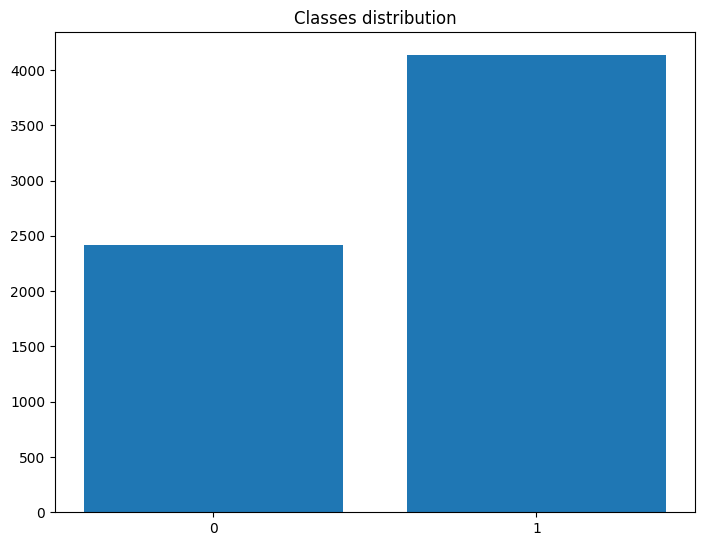

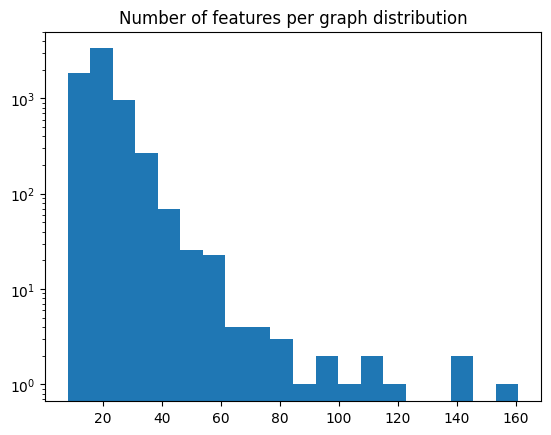

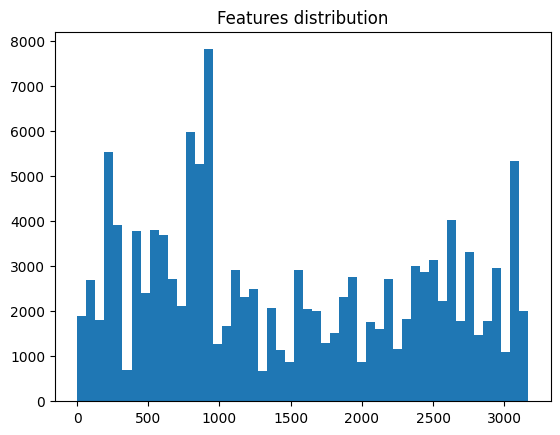

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks([0,1])
ax.bar([0,1],list(collections.Counter(target_data.mature).values()));
plt.title("Classes distribution")
plt.show()

plt.hist(feat_counts,bins=20)
plt.title("Number of features per graph distribution")
plt.yscale('log')
plt.show()

plt.hist(feats,bins=50)
plt.title("Features distribution")
plt.show()

In [7]:
G = nx.from_pandas_edgelist(edge_data,source='from',target='to')
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
is_directed = G.is_directed()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Is the graph directed? {is_directed}")

Number of nodes: 6549
Number of edges: 112666
Is the graph directed? False


In [8]:
centrality = nx.degree_centrality(G)

centrality = sorted(centrality.items(), key=lambda item: -1*item[1])
centrality[0], centrality[len(centrality) - 1][1], sum([1 for i in centrality if i[1] == centrality[len(centrality) - 1][1]])

((2161, 0.31154551007941356), 0.00015271838729383018, 247)

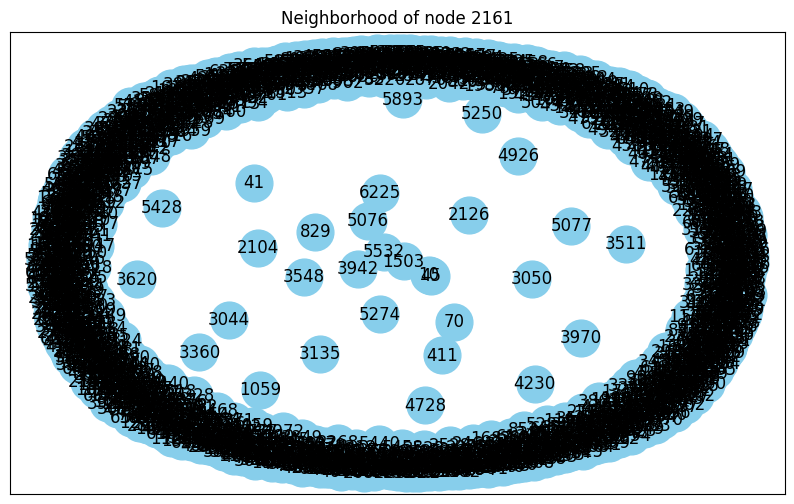

In [9]:
node_index = centrality[0][0]

edge_index = edge_data.to_numpy()
edge_example = edge_index[np.where((edge_index == node_index).any(axis=1))]
node_example = np.unique(edge_example.flatten())

plt.figure(figsize=(10, 6))
G = nx.Graph()
G.add_nodes_from(node_example)
G.add_edges_from(list(zip(edge_example[0], edge_example[1])))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=700, font_size=12)
plt.title("Neighborhood of node " + str(node_index))
plt.show()

Pour connaitre les 10 noeuds les plus connectés:

In [10]:
import heapq

heapq.nlargest(10, dict(centrality), key=dict(centrality).get)

[2161, 771, 5968, 5511, 5543, 6420, 1020, 5310, 2650, 4717]

In [11]:
G = nx.from_pandas_edgelist(edge_data,source='from',target='to')
close_centrality = nx.closeness_centrality(G)

In [12]:
sorted(list(close_centrality.items()), key=lambda x: x[1], reverse=True)

[(2161, 0.5737317094541312),
 (771, 0.5465776293823038),
 (5968, 0.5449400798934754),
 (5511, 0.5297306043200388),
 (6420, 0.5248897795591182),
 (5310, 0.5245113745594361),
 (5543, 0.5153470801196285),
 (2650, 0.5139717425431711),
 (1020, 0.511123253454063),
 (2560, 0.5070858824440486),
 (5208, 0.5044295508820584),
 (4717, 0.4994660564454615),
 (2043, 0.4954975406734771),
 (1751, 0.4898630956833994),
 (5554, 0.48532463682182037),
 (612, 0.4833899306068212),
 (3857, 0.4830333431690764),
 (3476, 0.48274845178413445),
 (1284, 0.4826061320754717),
 (4453, 0.4797772567409144),
 (2367, 0.4793206939462704),
 (5034, 0.4789000219410517),
 (6165, 0.47858500219266187),
 (2972, 0.47841017023452914),
 (3917, 0.47813070463672874),
 (6148, 0.47764242468451384),
 (3550, 0.4772246920778369),
 (5445, 0.4754229289188993),
 (420, 0.4750435287289611),
 (38, 0.47346348517715114),
 (410, 0.4732923744127214),
 (3459, 0.4729163657373971),
 (1824, 0.47274565013356434),
 (2124, 0.4722683014785431),
 (6271, 0.472

In [13]:
heapq.nlargest(10, close_centrality, key=close_centrality.get)

[2161, 771, 5968, 5511, 6420, 5310, 5543, 2650, 1020, 2560]

Remarque: Les quatres premiers nodes sont communs aux deux metriques.

In [14]:
G = nx.from_pandas_edgelist(edge_data,source='from',target='to')
centrality_between = nx.betweenness_centrality(G)

In [15]:
sorted(list(centrality_between.items()), key=lambda x: x[1], reverse=True)

[(2161, 0.10028584081459418),
 (771, 0.07585984643181576),
 (5968, 0.060976034420697295),
 (5511, 0.05799467570834975),
 (6420, 0.04063797234561007),
 (5543, 0.03754943799629022),
 (2560, 0.037509375121663524),
 (1020, 0.03738198306204239),
 (5310, 0.03058210208167358),
 (2650, 0.025489522640353025),
 (4717, 0.02542222726813938),
 (2043, 0.01788817584014939),
 (5208, 0.017003694265184333),
 (2367, 0.014754048767826),
 (5554, 0.013935282029001805),
 (3459, 0.012869455539539955),
 (612, 0.012548821631858213),
 (3550, 0.01239317932394196),
 (77, 0.012332917690210365),
 (1025, 0.011776592300796477),
 (3935, 0.011504643338517615),
 (1751, 0.011363030065027457),
 (6271, 0.01019529255988365),
 (3476, 0.009701471549628594),
 (6148, 0.009687217348077247),
 (3857, 0.008678724528392573),
 (4069, 0.008432001379241985),
 (5034, 0.008280793949202133),
 (2972, 0.007386071013789786),
 (1284, 0.007336611014225421),
 (2584, 0.00674769322817442),
 (1824, 0.006395133704364445),
 (2799, 0.00634020666781170

In [16]:
heapq.nlargest(10, centrality_between, key=centrality_between.get)

[2161, 771, 5968, 5511, 6420, 5543, 2560, 1020, 5310, 2650]

The subgraphs containing the nodes that are common in all the centrality metrics will be created in the following cells.

In [17]:
G = nx.from_pandas_edgelist(edge_data,source='from',target='to')

In [18]:
nodes = (set([2161, 771, 5968, 5511, 5543, 6420, 1020, 5310, 2650, 4717]).intersection(set([2161, 771, 5968, 5511, 6420, 5310, 5543, 2650, 1020, 2560]))).intersection(set([2161, 771, 5968, 5511, 6420, 5543, 2560, 1020, 5310, 2650]))
nodes

{771, 1020, 2161, 2650, 5310, 5511, 5543, 5968, 6420}

In [19]:
Top_streamers_subgraph = G.subgraph(list(nodes))

In [20]:
num_nodes = Top_streamers_subgraph.number_of_nodes()
num_edges = Top_streamers_subgraph.number_of_edges()
avg_degree = average_degree = np.round(sum(dict(Top_streamers_subgraph.degree()).values()) / num_nodes, 2)
is_directed = Top_streamers_subgraph.is_directed()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree}")
print(f"Is the graph directed? {is_directed}")

Number of nodes: 9
Number of edges: 25
Average degree: 5.56
Is the graph directed? False


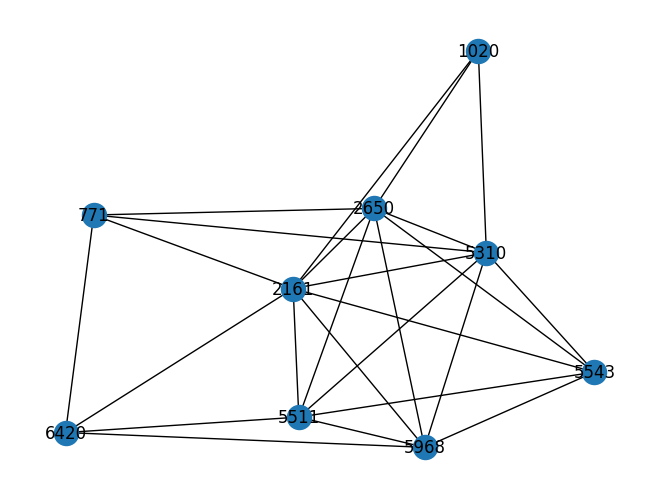

In [21]:
nx.draw(Top_streamers_subgraph,with_labels=True)

In [22]:
target_data[target_data.new_id.isin(nodes)]

,id,days,mature,views,partner,new_id
875,18887776,2853,1,9194058,True,5310
1188,147337432,610,0,42801507,True,5968
1707,41719107,2027,1,44374644,True,2161
2838,28575692,2419,0,17166188,True,771
3363,52130765,1783,0,4890741,True,5543
3681,89872865,1261,0,5875963,True,2650
4044,84934385,1311,0,62713570,True,6420
4660,27085209,2480,1,22400233,True,1020
4720,24147592,2613,0,44534929,True,5511


On looking at the top 9 streamers on Twitch, we can see that they all have a partner and have been streaming for atleast 3 years with the streamer 5968 being an exception to the rule.

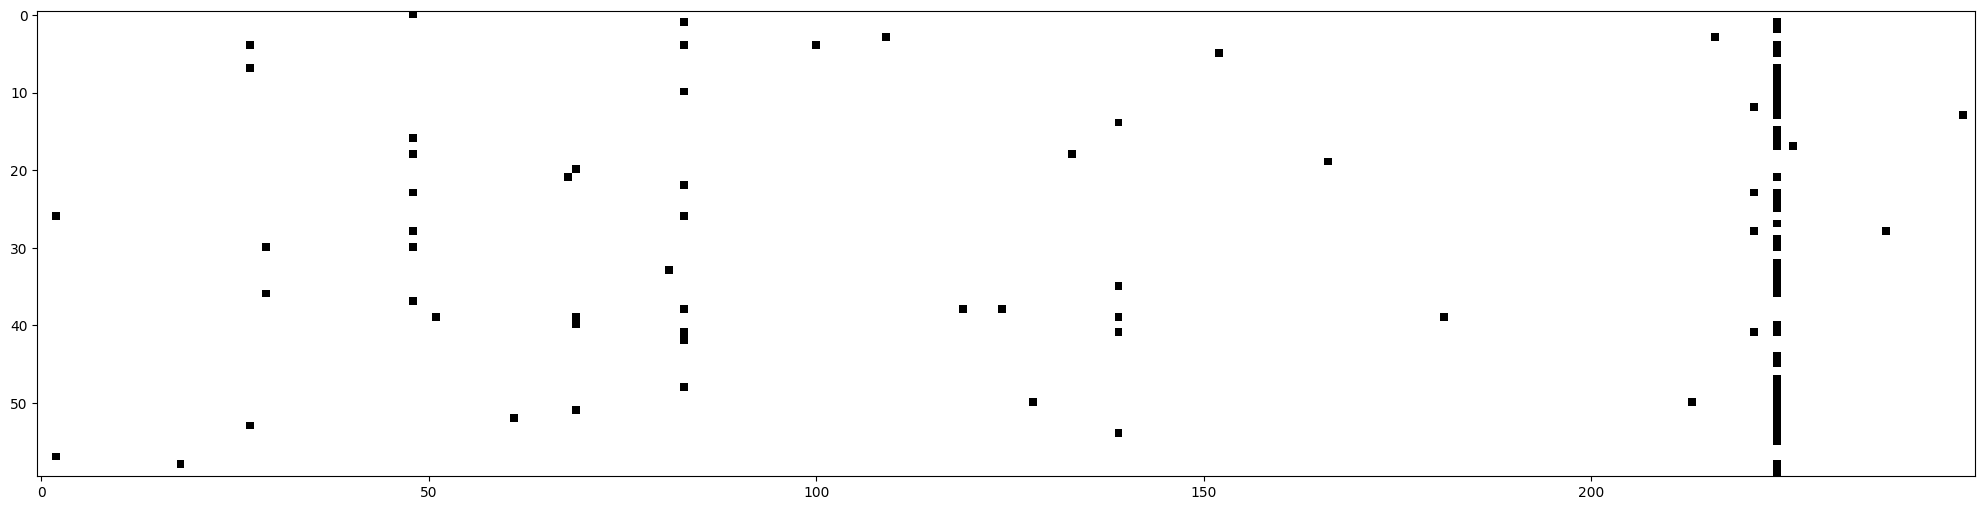

In [23]:
def encode_data(light=False,n=60):
    if light==True:
        nodes_included=n
    elif light==False:
        nodes_included=len(data_raw)
    
    data_encoded={}
    for i in range(nodes_included):
        one_hot_feat=np.array([0]*(max(feats)+1))
        this_feat=data_raw[str(i)]
        one_hot_feat[this_feat]=1
        data_encoded[str(i)]=list(one_hot_feat)
    
    if light==True:
        sparse_feat_matrix=np.zeros((1,max(feats)+1))
        for j in range(nodes_included):
            temp=np.array(data_encoded[str(j)]).reshape(1,-1)
            sparse_feat_matrix=np.concatenate((sparse_feat_matrix,temp),axis=0)
        sparse_feat_matrix=sparse_feat_matrix[1:,:]
        return(data_encoded,sparse_feat_matrix)
    elif light==False:
        return(data_encoded, None)
    
data_encoded_vis,sparse_feat_matrix_vis=encode_data(light=True,n=60)
plt.figure(figsize=(25,25));
plt.imshow(sparse_feat_matrix_vis[:,:250],cmap='Greys');